#**Introduction**

---

https://www.kaggle.com/bhrt97/hr-analytics-classification

Name-surname: Natanon Tangkijngamwong

ID: 6110551384

Sec: 250

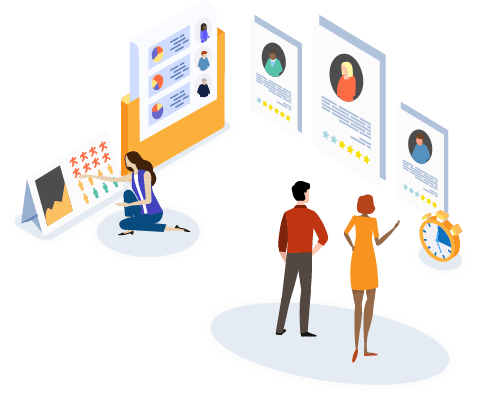

##Check point of Project

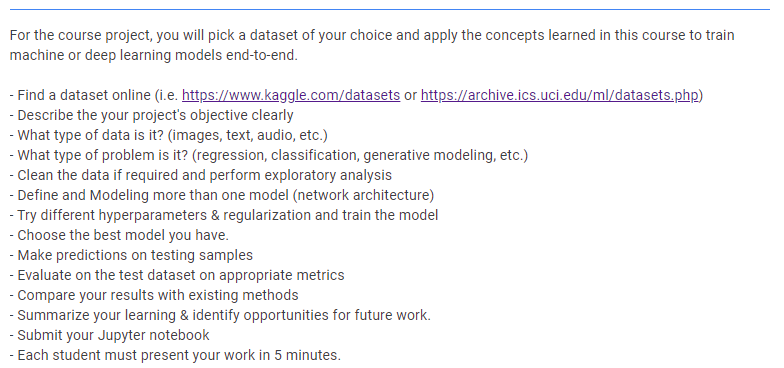

##What Is HR Analytics?
- HR Analytics คือ การทำวิเคราะห์ กับข้อมูลที่เกี่ยวกับทรัพยากรมนุษย์ที่มีอยู่  เพื่อให้เกิดผลลัพธ์ที่สำคัญ  
และนำมาทำแผนกลยุทธ์ด้าน HR ให้สอดคล้องกับองค์กรหรือธุรกิจ ซึ่งนําไปสู่การทําให้การตัดสินใจทางด้านทุนมนุษย์ดีขึ้น



##Context (Abstract)

- HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.

##Content

- Your client is a large MNC (A multinational corporation) and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

  They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion.

  For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

  They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

- ลูกค้าเป็นบริษัทข้ามชาติ โดยธุรกิจที่ทําอยู่มี 9 เเผนกทั่วทุกสาขาองค์กร 
- ปัญหาที่พบคือ จะเลือกคนที่ควรจะได้รับการเลื่อนขั้นยังไงให้ได้ถูกคน (only for manager position and below)
- โดยปกติสิ่งเเรกที่จะดูคือ จะระบุกลุ่มพนักงานตามคําเเนะนํา กับจากผลการปฏิบัติงานที่ผ่านมา พนักงานที่ได้รับการคัดเลือกต้องผ่านการฝึกอบรมและโปรแกรมประเมินผลแยกกันสำหรับแต่ละประเภทธุรกิจ
- ในตอนท้ายของโปรเเกรมฝึกอบรม ก็จะมีหลายปัจจัยที่ช่วยในการพิจารณาการเลื่อนตําเเหน่ง 
ex: จาก ผลการฝึกอบรม, KPI > 60% etc.
- กระบวนการเลื่อนขั้นจะเกิดขั้นหลังจากการใช้เวลาประเมิณเเล้วเท่านั้น ทําให้การเปลี่ยนบทบาทใหม่ของคนที่จะได้เลื่อนขั้นล่าช้า เขาจึงต้องการให้เราช่วยเขาระบุคนที่มีเเนวโน้มสูงจะได้เลื่อนขั้น เพื่อจัดการเรื่องนี้ให้มันดีขึ้นไวขึ้น
- โดยเขาได้จัดเตรียมข้อมูล คุณลักษณะต่างๆของพนักงานให้เเล้ว

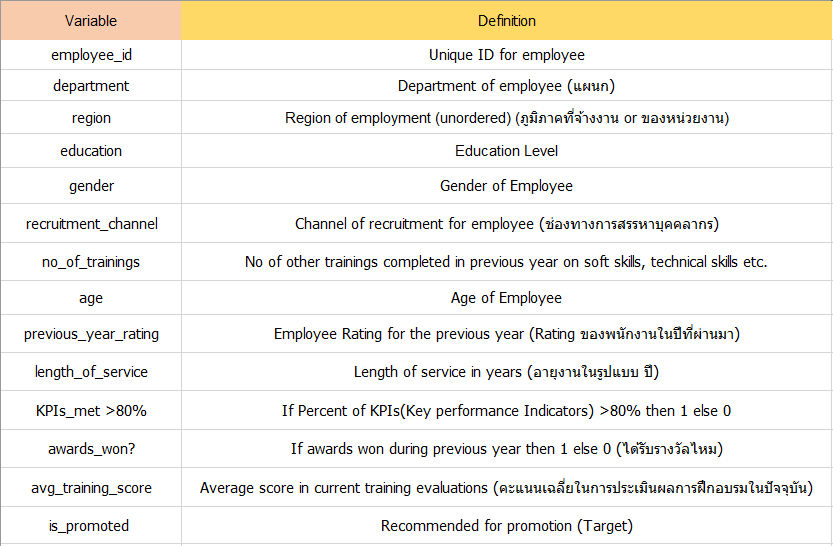

##Task

- การทำนายหาพนักงานผู้ที่มีศักยภาพที่จะเลื่อนตำแหน่ง (Promoted) เพื่อให้กระบวนการเลื่อนขั้นเกิดขึ้นได้ไวมากขึ้น

##Data Type

- เป็น file csv

##Problem Type

- Binary Classification 

##Acknowledgements

- This data set has been scraped from a contest held by https://www.analyticsvidhya.com/

##Block diagram

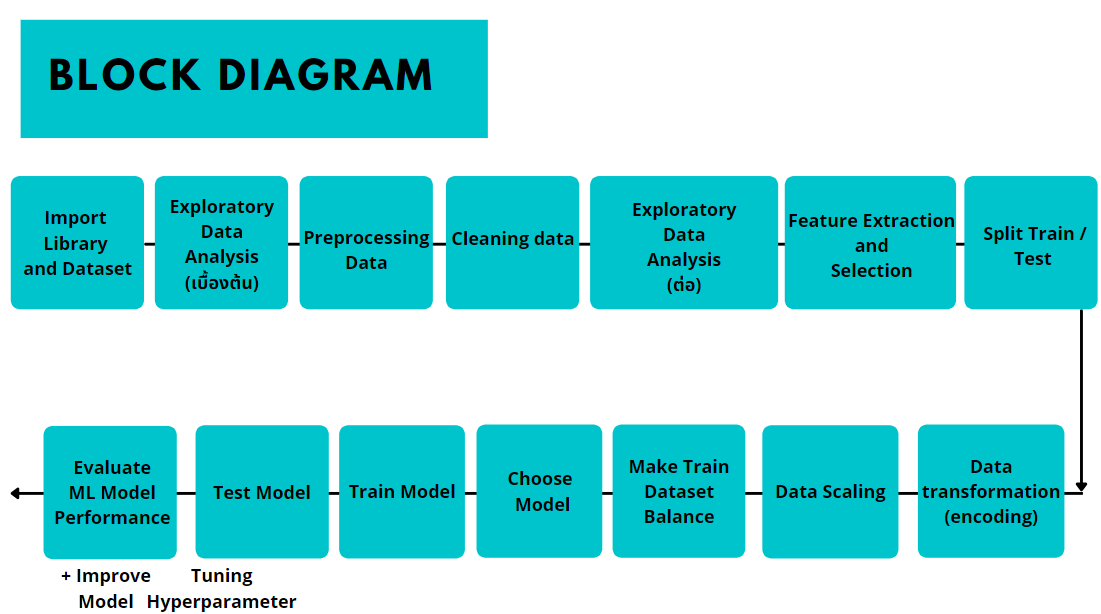

#**Import Library**

---



In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report, confusion_matrix, jaccard_similarity_score, average_precision_score
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

#**Import Dataset**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/DL_Project/train_LZdllcl.csv')
#เหมือของจริงมากเลย ไม่มี target 
df_test = pd.read_csv('/content/drive/MyDrive/DL_Project/test_2umaH9m.csv')

#**Exploratory Data Analysis**

---



In [ ]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


##**Value count check**


---


- ทําเพื่อดูจํานวนประเภทของข้อมูลในเเต่ละ col

In [ ]:
df_train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [ ]:
df_train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [ ]:
df_re = df_train['region'].value_counts().reset_index()
df_re.columns = ['region', 'count']
df_re

,region,count
0,region_2,12343
1,region_22,6428
2,region_7,4843
3,region_15,2808
4,region_13,2648
5,region_26,2260
6,region_31,1935
7,region_4,1703
8,region_27,1659
9,region_16,1465


In [ ]:
df_re['sort'] = df_re['region'].str.extract('(\d+)', expand=False).astype(int)
df_re.sort_values('sort',inplace=True, ascending=False)
df_re = df_re.drop('sort', axis=1)
df_re

,region,count
31,region_34,292
32,region_33,269
14,region_32,945
6,region_31,1935
22,region_30,657
13,region_29,994
10,region_28,1318
8,region_27,1659
5,region_26,2260
18,region_25,819


In [ ]:
df_train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [ ]:
df_train['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [ ]:
df_train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [ ]:
df_train['no_of_trainings'].value_counts().sort_index()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
9         5
10        5
Name: no_of_trainings, dtype: int64

In [ ]:
df_train['age'].value_counts().sort_index()

20     113
21      98
22     231
23     428
24     845
25    1299
26    2060
27    2827
28    3147
29    3405
30    3665
31    3534
32    3534
33    3210
34    3076
35    2711
36    2517
37    2165
38    1923
39    1695
40    1663
41    1289
42    1149
43     992
44     847
45     760
46     697
47     557
48     557
49     441
50     521
51     389
52     351
53     364
54     313
55     294
56     264
57     238
58     213
59     209
60     217
Name: age, dtype: int64

In [ ]:
df_train['previous_year_rating'].value_counts().sort_index()

1.0     6223
2.0     4225
3.0    18618
4.0     9877
5.0    11741
Name: previous_year_rating, dtype: int64

In [ ]:
df_train['length_of_service'].value_counts().sort_index()

1     4547
2     6684
3     7033
4     6836
5     5832
6     4734
7     5551
8     2883
9     2629
10    2193
11     916
12     794
13     687
14     549
15     593
16     548
17     432
18     392
19     329
20     128
21      78
22      61
23      65
24      70
25      51
26      41
27      36
28      30
29      30
30      12
31      20
32      10
33       9
34       4
37       1
Name: length_of_service, dtype: int64

In [ ]:
df_train['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

In [ ]:
df_train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

In [ ]:
df_train['avg_training_score'].value_counts().sort_index()

39      2
40      5
41     26
42     62
43    176
     ... 
95     45
96     48
97     49
98     37
99     35
Name: avg_training_score, Length: 61, dtype: int64

##**Data Column Type**

---



**Categorical data:**


1.   department: มี 9 เเผนก 
  - Sales & Marketing
  - HR
  - Analytics 
  - Operations = ปฏิบัติการ
  - Technology
  - R&D = research and development (วิจัยเเละพัฒนา)
  - Procurement = จัดซื้อจัดจ้าง
  - Finance
  - Legal
2.   region: มี 34 region

1.   education: มี 3 เเบบ
  - Bachelor's 
  - Master's & above
  - Below Secondary 
2.   gender: มี 2 เเบบ
  - Male
  - Female
1.   recruitment_channel: มี 3 channels   
  - Sourcing = การจัดหาบุคลากรจากการประเมิณบุคคล
  - Referred = การเเนะนํา
  - Other = วิธีการอื่นๆ
**Numerical Data:**

1.   employee_id: เยอะเเละไม่น่าสนใจ
2.   no_of_trainings: จํานวนตั้งเเต่ 1 - 10 ครั้ง        

1.   age: อายุตั้งเเต่ 20 - 60 ปี                   
2.   previous_year_rating: rating ตั้งเเต่ 1 - 5 

1.   length_of_service: อายุการทํางานตั้งเเต่ 1 - 37 ปี
2.   KPIs_met >80%: 0,1

1.   awards_won?: 0,1
2.   avg_training_score: มีคะเเนนเฉลี่ยตั้งเเต่ 39 - 99 คะเเนน

1.   is_promoted (Target): 0,1

















##**Shape ของ Dataset**

---



In [ ]:
df_train.shape 

(54808, 14)

In [ ]:
df_test.shape

(23490, 13)

##**Check Duplicate rows**

---



In [ ]:
dupl=df_train[df_train.duplicated()]
dupl.shape

(0, 14)

In [ ]:
dupl=df_test[df_test.duplicated()]
dupl.shape

(0, 13)

###**Conclusion:** 

ไม่มี duplicate row

##**Check Missing Value**

---



In [ ]:
df_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
# "education" missing
print('Percent of missing "education" records is %.2f%%' %((df_train['education'].isnull().sum()/df_train.shape[0])*100))

# "previous_year_rating" missing
print('Percent of missing "previous_year_rating" records is %.2f%%' %((df_train['previous_year_rating'].isnull().sum()/df_train.shape[0])*100))

Percent of missing "education" records is 4.40%
Percent of missing "previous_year_rating" records is 7.52%


In [ ]:
df_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [ ]:
# "education" missing
print('Percent of missing "education" records is %.2f%%' %((df_test['education'].isnull().sum()/df_test.shape[0])*100))

# "previous_year_rating" missing
print('Percent of missing "previous_year_rating" records is %.2f%%' %((df_test['previous_year_rating'].isnull().sum()/df_test.shape[0])*100))

Percent of missing "education" records is 4.40%
Percent of missing "previous_year_rating" records is 7.71%


###**Conclusion:**
- Missing data: 

  1.   education 
  2.   previous_year_rating

- จาก Percentage of missing value ที่คิดออกมาจะสามารถสรุปได้ว่าไม่ได้มีความจําเป็นจะตัอง drop ข้อมูลทิ้ง สามารถที่จะ fill(Impute) ได้โดยอาศัยหลักสถิติ

##**Correlation**

---



In [ ]:
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


##**Data visualization**

---



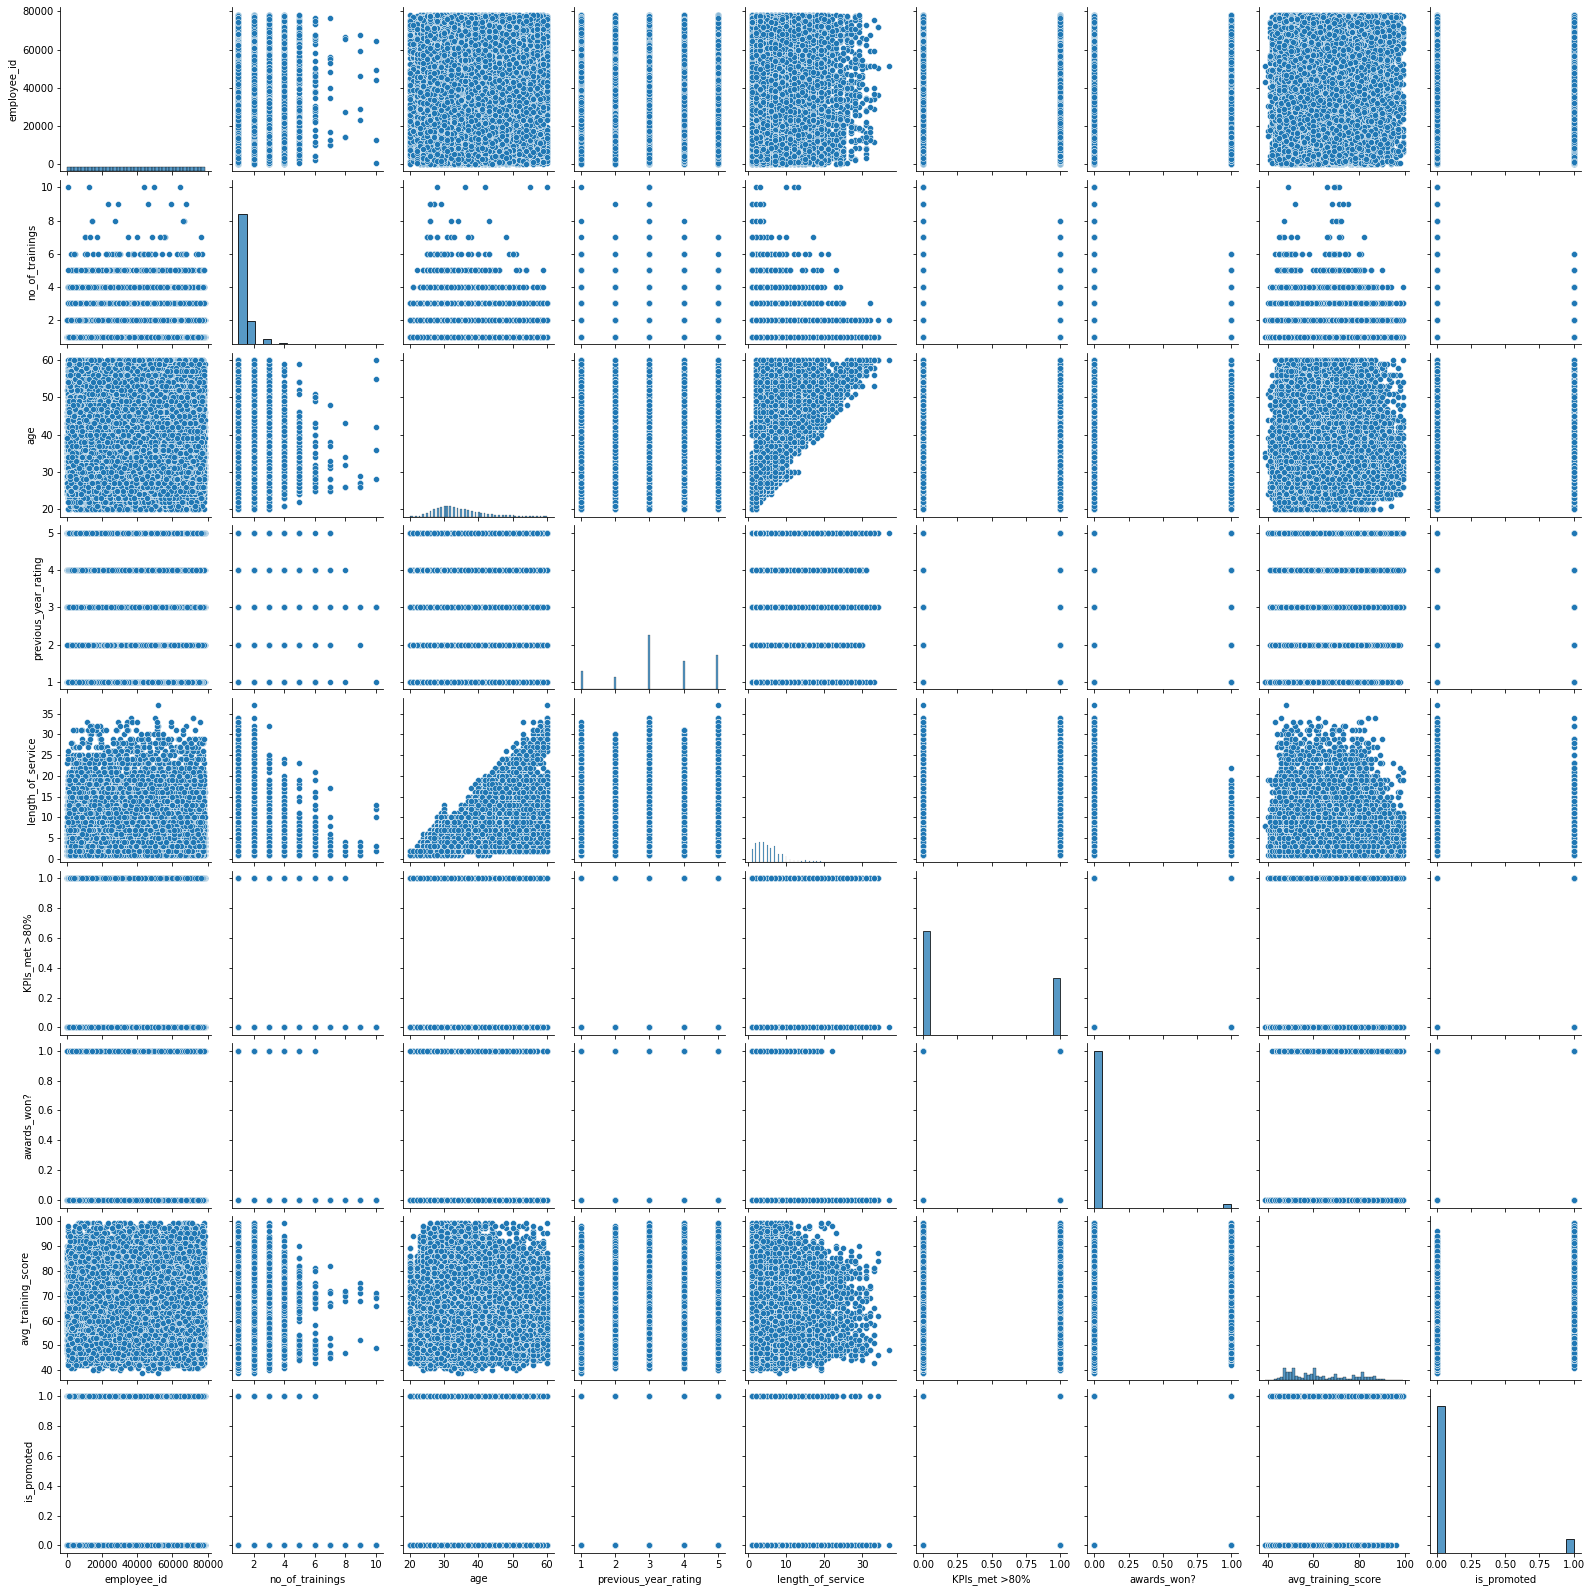

In [ ]:
sns.pairplot(df_train)

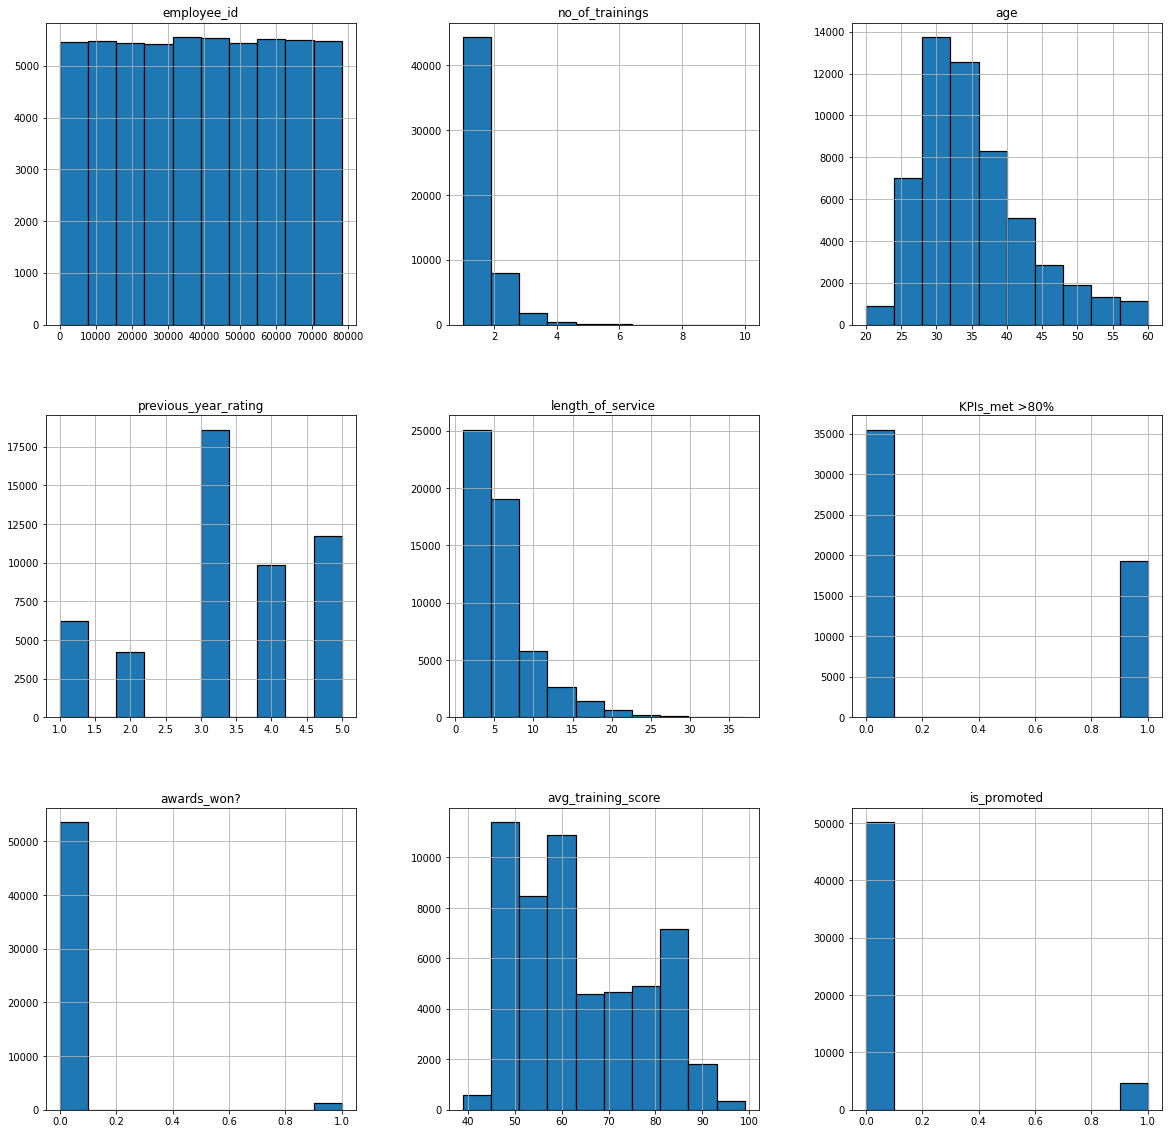

In [ ]:
df_train.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

###Department

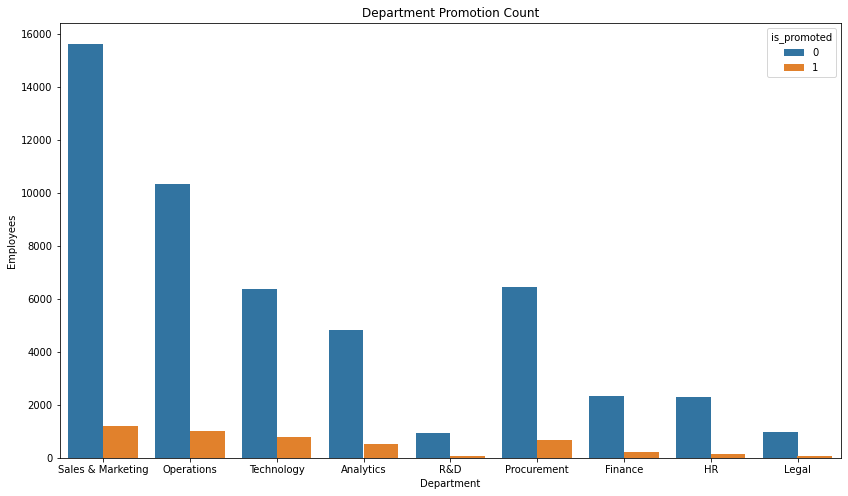

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x='department',hue='is_promoted',data=df_train)
plt.title('Department Promotion Count')
plt.xlabel('Department')
plt.ylabel('Employees')
plt.show()

In [ ]:
y=df_train.groupby(['department','is_promoted'])['is_promoted'].count().unstack()
percent_promotion = y[1] / (y[0]+y[1])
percent_promotion.sort_values(ascending=False).head()

department
Technology     0.107593
Procurement    0.096386
Analytics      0.095665
Operations     0.090148
Finance        0.081230
dtype: float64

**สรุป:**จะสังเกตเห็นว่า อัตราของการเลื่อนขั้นของเเต่ละเเผนกจะไม่ต่างกันนักที่สูงที่สุดสามตัวจะเป็น Technology, Analytics เเละ Procurement

###region

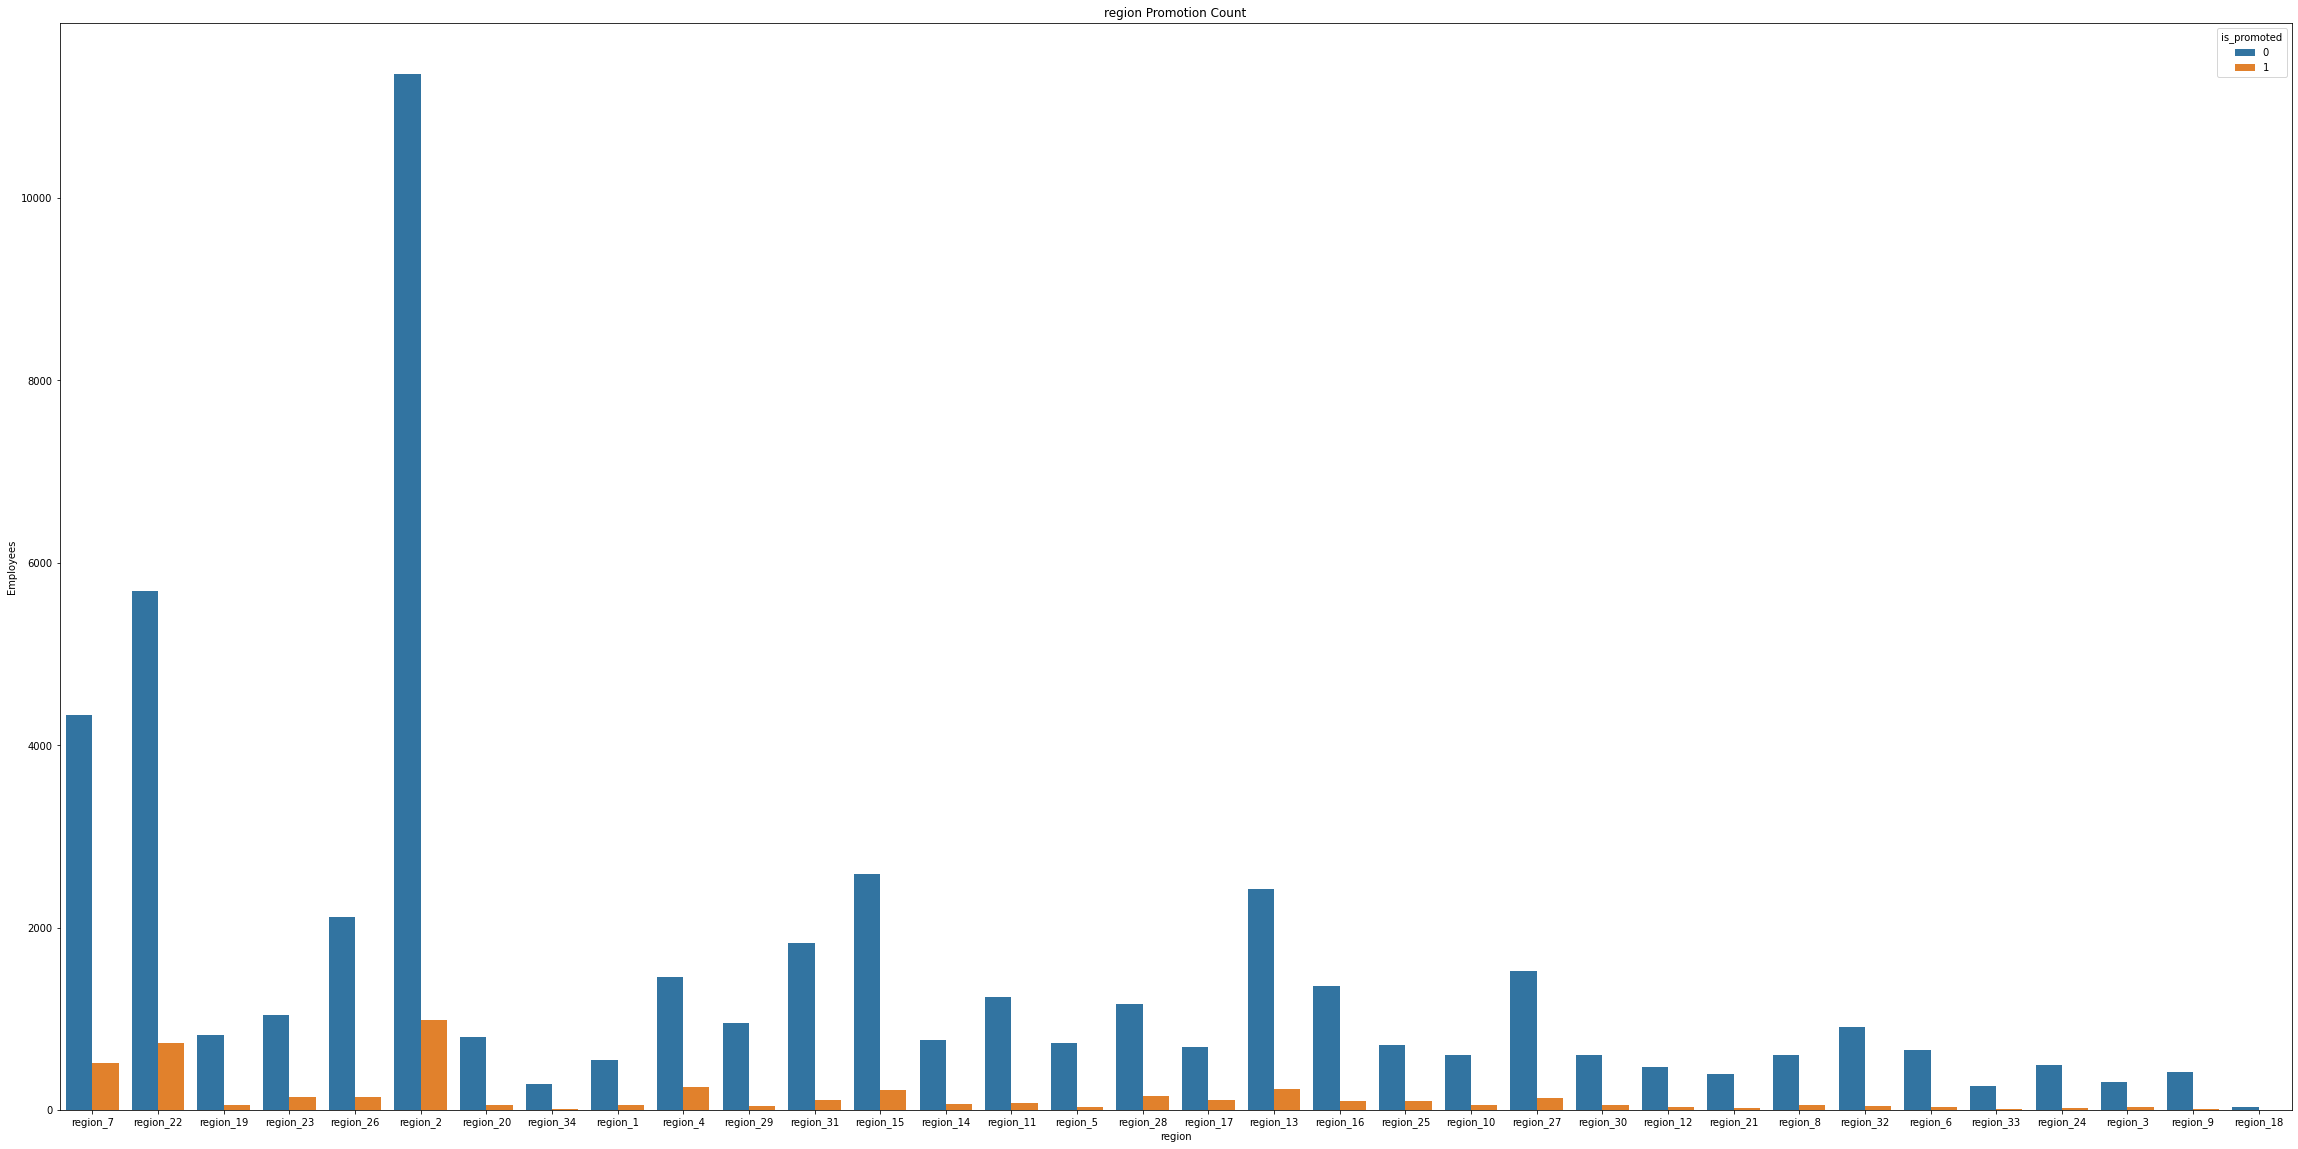

In [ ]:
plt.figure(figsize=(40,20))
sns.countplot(x='region',hue='is_promoted',data=df_train)
plt.title('region Promotion Count')
plt.xlabel('region')
plt.ylabel('Employees')
plt.show()

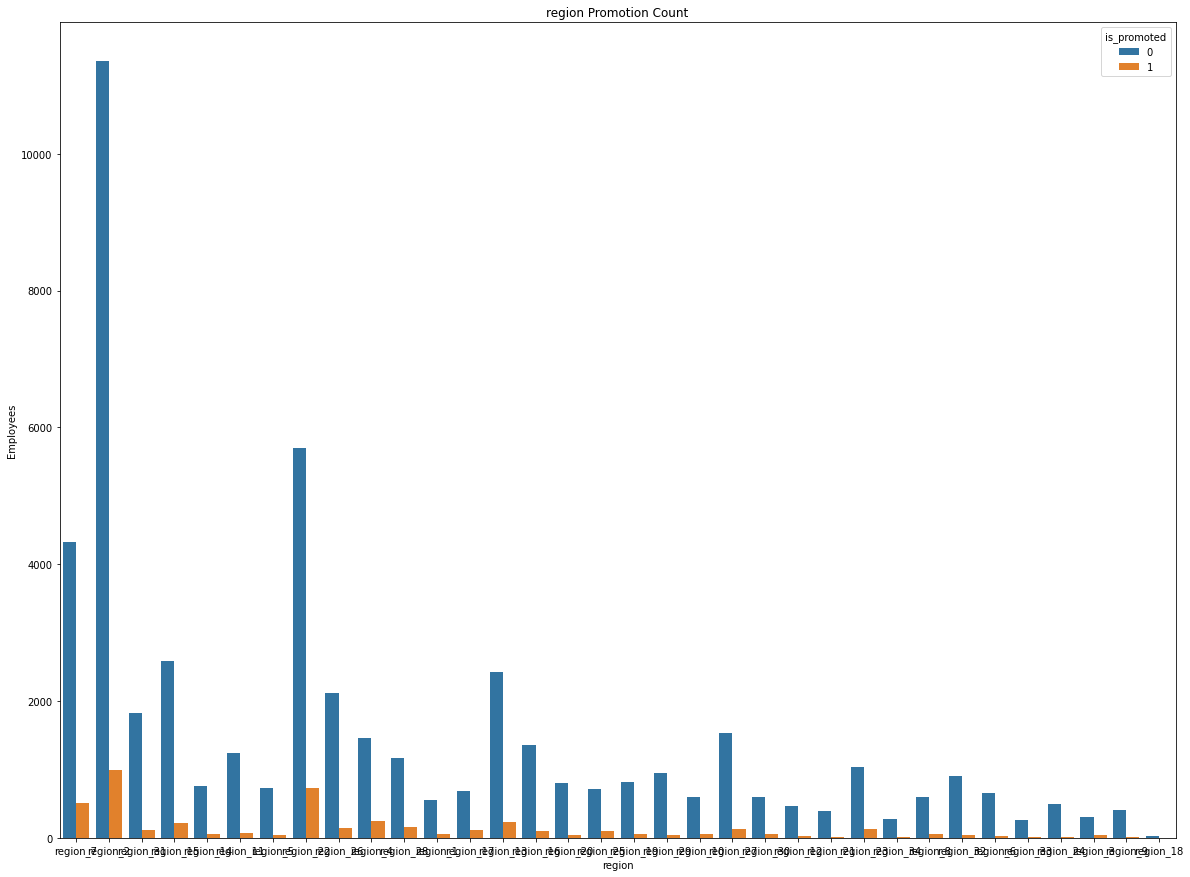

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(x='region',hue='is_promoted',data=df_train.iloc[15:])
plt.title('region Promotion Count')
plt.xlabel('region')
plt.ylabel('Employees')
plt.show()

In [ ]:
y=df_train.groupby(['region','is_promoted'])['is_promoted'].count().unstack()
y

is_promoted,0,1
region,,
region_1,552,58
region_10,597,51
region_11,1241,74
region_12,467,33
region_13,2418,230
region_14,765,62
region_15,2586,222
region_16,1363,102
region_17,687,109


In [ ]:
y[0].head()

region
region_1      552
region_10     597
region_11    1241
region_12     467
region_13    2418
Name: 0, dtype: int64

In [ ]:
y[1].head()

region
region_1      58
region_10     51
region_11     74
region_12     33
region_13    230
Name: 1, dtype: int64

In [ ]:
reg_percent_promotion = y[1] / (y[0]+y[1])
reg_percent_promotion.sort_values(ascending=False)

region
region_4     0.144451
region_17    0.136935
region_25    0.125763
region_28    0.116844
region_23    0.116596
region_22    0.114188
region_3     0.106936
region_7     0.106546
region_1     0.095082
region_30    0.089802
region_13    0.086858
region_8     0.080916
region_2     0.080126
region_15    0.079060
region_27    0.078963
region_10    0.078704
region_14    0.074970
region_16    0.069625
region_12    0.066000
region_26    0.063274
region_19    0.060641
region_20    0.057647
region_31    0.056848
region_11    0.056274
region_6     0.046377
region_5     0.045692
region_21    0.043796
region_29    0.043260
region_32    0.042328
region_33    0.037175
region_24    0.035433
region_18    0.032258
region_34    0.027397
region_9     0.019048
dtype: float64

**สรุป:** จะสังเกตเห็นว่า อัตราการเลื่อนขั้นของregion region 3 อันดับเเรกเป็น region 4,17,25

###gender

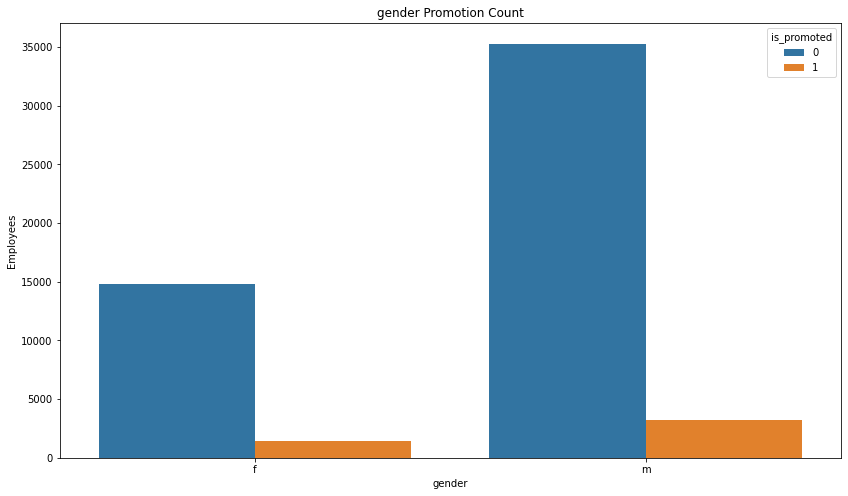

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x='gender',hue='is_promoted',data=df_train)
plt.title('gender Promotion Count')
plt.xlabel('gender')
plt.ylabel('Employees')
plt.show()

In [ ]:
fig = px.pie(df_train, names='gender')
fig.show()

In [ ]:
y=df_train.groupby(['gender','is_promoted'])['is_promoted'].count().unstack()
percent_promotion = y[1] / (y[0]+y[1])
percent_promotion.sort_values(ascending=False).head()

gender
f    0.089934
m    0.083151
dtype: float64

**สรุป:** 

1.จะเห็นว่า จ้างผู้ชายมากกว่าผู้หญิง โดยผู้ชายคิดเป็น 70% ของคนทั้งหมด

2.อัตราการเลื่อนขั้นของเพศหญิงสูงกว่าผู้ชายอยู่เเต่ไม่ได้มาก

###recruitment_channel

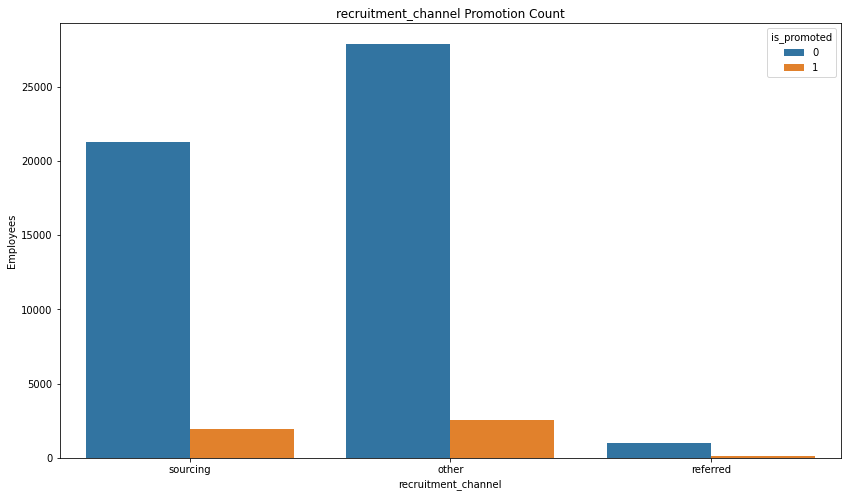

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x='recruitment_channel',hue='is_promoted',data=df_train)
plt.title('recruitment_channel Promotion Count')
plt.xlabel('recruitment_channel')
plt.ylabel('Employees')
plt.show()

In [ ]:
fig = px.pie(df_train, names='recruitment_channel')
fig.show()

In [ ]:
y=df_train.groupby(['recruitment_channel','is_promoted'])['is_promoted'].count().unstack()
percent_promotion = y[1] / (y[0]+y[1])
percent_promotion.sort_values(ascending=False).head()

recruitment_channel
referred    0.120841
sourcing    0.085013
other       0.083952
dtype: float64

**สรุป:**

1. รูปเเบบของการจัดหาบุคลากรเรียงจากมากไปน้อย other > sourcing > reffered
2. คนที่ถูกจ้างเข้ามาด้วย วิธี referred มีอัตราการเลื่อนขั้นสูงที่สุด

###no_of_trainings

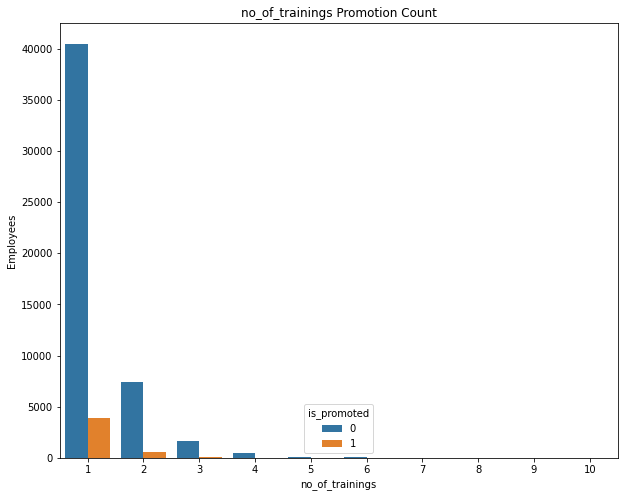

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='no_of_trainings',hue='is_promoted',data=df_train)
plt.title('no_of_trainings Promotion Count')
plt.xlabel('no_of_trainings')
plt.ylabel('Employees')
plt.show()

In [ ]:
y=df_train.groupby(['no_of_trainings','is_promoted'])['is_promoted'].count().unstack()
percent_promotion = y[1] / (y[0]+y[1])
percent_promotion.sort_values(ascending=False).head()

no_of_trainings
1    0.088107
2    0.075748
3    0.068694
4    0.055556
6    0.045455
dtype: float64

**สรุป:** ยิ่ง train หลายครั้งอัตราการเลื่อนขั้นยิ่งลด

###age

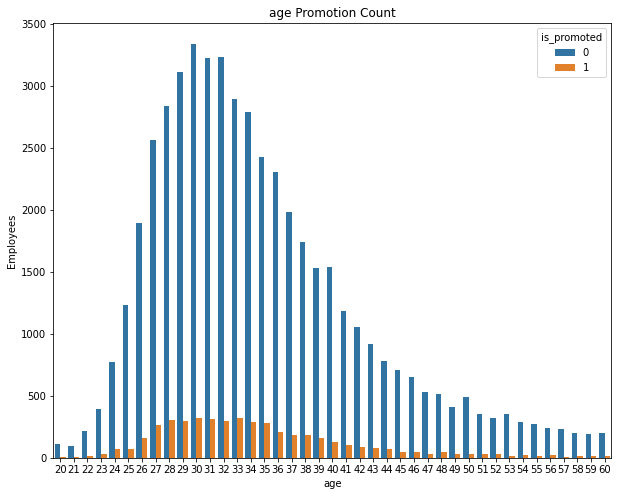

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='age',hue='is_promoted',data=df_train)
plt.title('age Promotion Count')
plt.xlabel('age')
plt.ylabel('Employees')
plt.show()

In [ ]:
y=df_train.groupby(['age','is_promoted'])['is_promoted'].count().unstack()
percent_promotion = y[1] / (y[0]+y[1])
percent_promotion.sort_values(ascending=False)

age
35    0.104390
33    0.099377
28    0.097871
38    0.095684
39    0.094985
34    0.092978
27    0.092324
30    0.088404
31    0.087719
51    0.087404
29    0.086344
37    0.084988
32    0.084041
24    0.082840
44    0.082645
36    0.082638
59    0.081340
41    0.080683
52    0.079772
56    0.079545
23    0.079439
42    0.079199
26    0.079126
48    0.078995
22    0.077922
43    0.077621
54    0.076677
40    0.076368
58    0.075117
49    0.074830
60    0.064516
45    0.063158
46    0.061693
55    0.061224
50    0.059501
25    0.053118
21    0.051020
47    0.048474
53    0.038462
20    0.035398
57    0.021008
dtype: float64

**สรุป:** 
1. คนส่วนมากอายุอยู่ในช่วง 20 ปลายถึงช่วง 30 
2. อัตราการเลื่อนขั้นไม่ค่อยมีความต่างกันเท่าไหร่นักเเทบจะเท่าๆกัน

###length_of_service

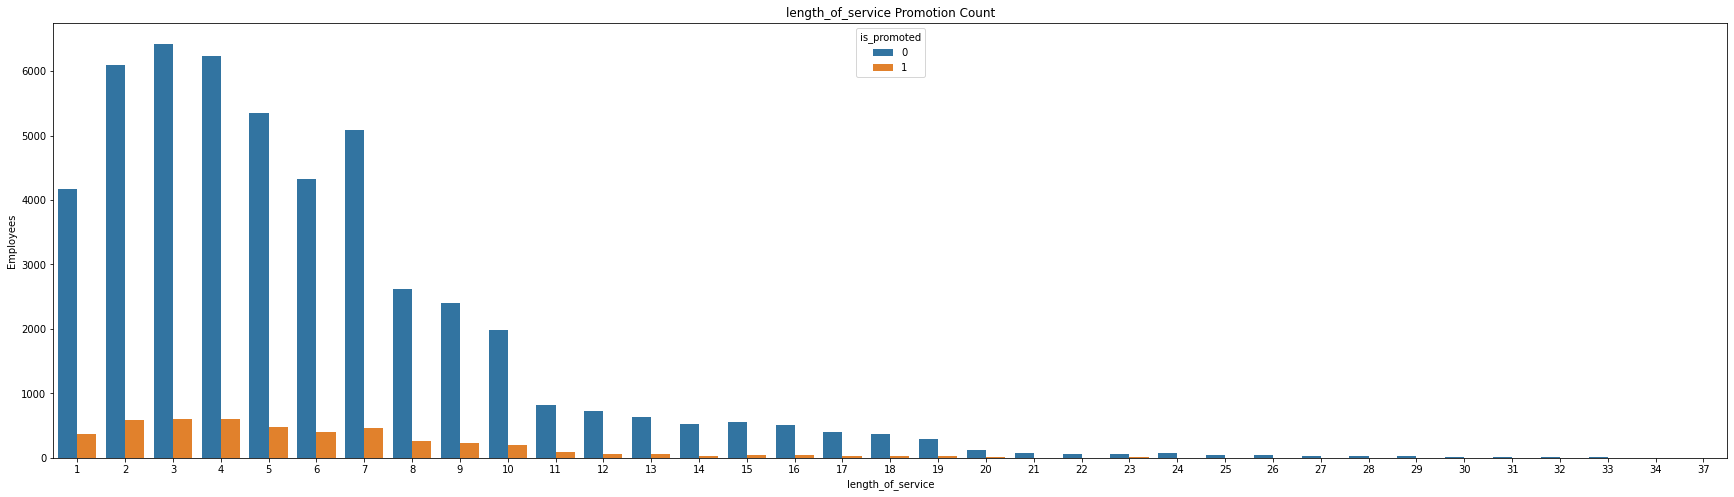

In [ ]:
plt.figure(figsize=(30,8))
sns.countplot(x='length_of_service',hue='is_promoted',data=df_train)
plt.title('length_of_service Promotion Count')
plt.xlabel('length_of_service')
plt.ylabel('Employees')
plt.show()

In [ ]:
y

is_promoted,0,1
age,,
20,109,4
21,93,5
22,213,18
23,394,34
24,775,70
25,1230,69
26,1897,163
27,2566,261
28,2839,308


In [ ]:
y=df_train.groupby(['length_of_service','is_promoted'])['is_promoted'].count().unstack()
percent_promotion = y[1] / (y[0]+y[1])
percent_promotion.sort_values(ascending=False)

length_of_service
34    0.250000
32    0.200000
23    0.107692
11    0.104803
29    0.100000
22    0.098361
19    0.097264
8     0.093306
10    0.093023
2     0.089019
4     0.087478
9     0.087105
3     0.086592
6     0.084706
7     0.083589
1     0.082912
5     0.081447
12    0.079345
13    0.078603
20    0.078125
16    0.074818
15    0.072513
28    0.066667
18    0.063776
17    0.060185
14    0.052823
21    0.051282
25    0.039216
27    0.027778
24         NaN
26         NaN
30         NaN
31         NaN
33         NaN
37         NaN
dtype: float64

**สรุป:**
1. ไม่ค่อยมีคนที่อายุการทํางานที่สูง 
2. อัตราการเลื่อนขั้นของคนอายุการทํางานที่สูงบางคน มีอัตราที่สูง

###KPIs_met >80%

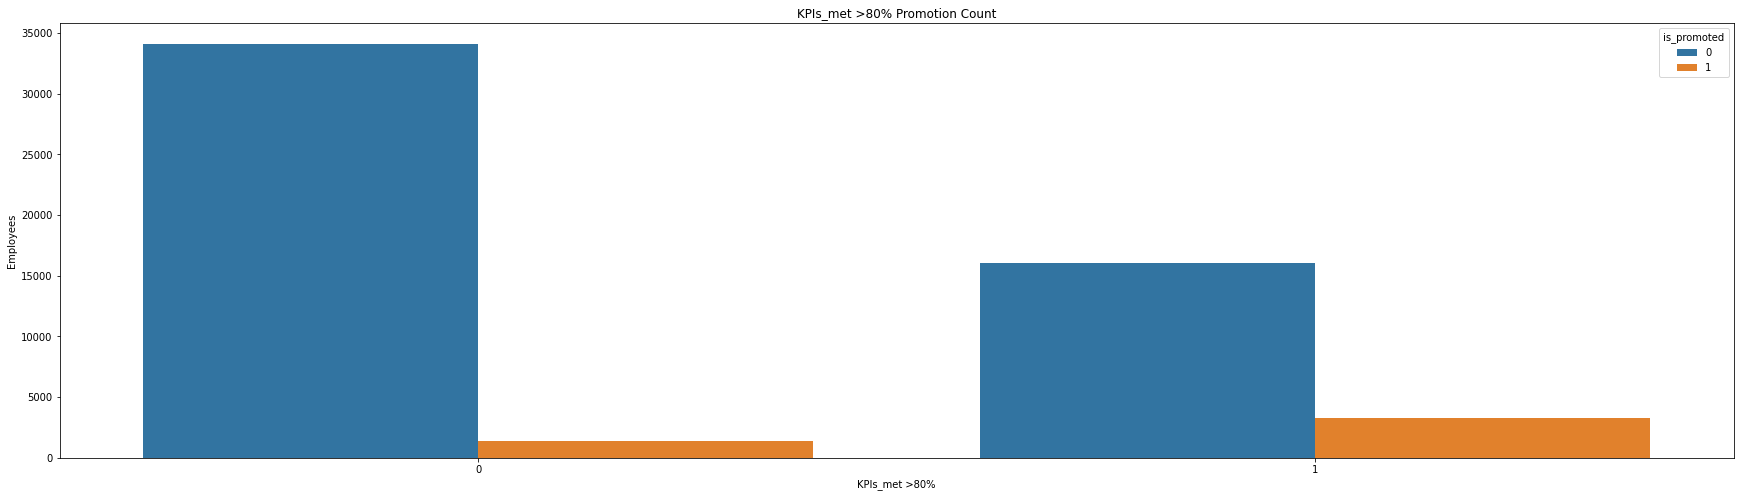

In [ ]:
plt.figure(figsize=(30,8))
sns.countplot(x='KPIs_met >80%',hue='is_promoted',data=df_train)
plt.title('KPIs_met >80% Promotion Count')
plt.xlabel('KPIs_met >80%')
plt.ylabel('Employees')
plt.show()

In [ ]:
y=df_train.groupby(['KPIs_met >80%','is_promoted'])['is_promoted'].count().unstack()
percent_promotion = y[1] / (y[0]+y[1])
percent_promotion.sort_values(ascending=False).head()

KPIs_met >80%
1    0.169094
0    0.039587
dtype: float64

สรุป: 
1. จํานวนคนที่ KPI > 80% มีจํานวนน้อยกว่าคนคนที่ KPI ตํ่ากว่า 80%

2. อัตราการเลื่อนขั้นของคนที่ KPI > 80% สูงกว่าคนที่ KPI ตํ่ากว่า 80% อย่างชัดเจน

###awards_won?

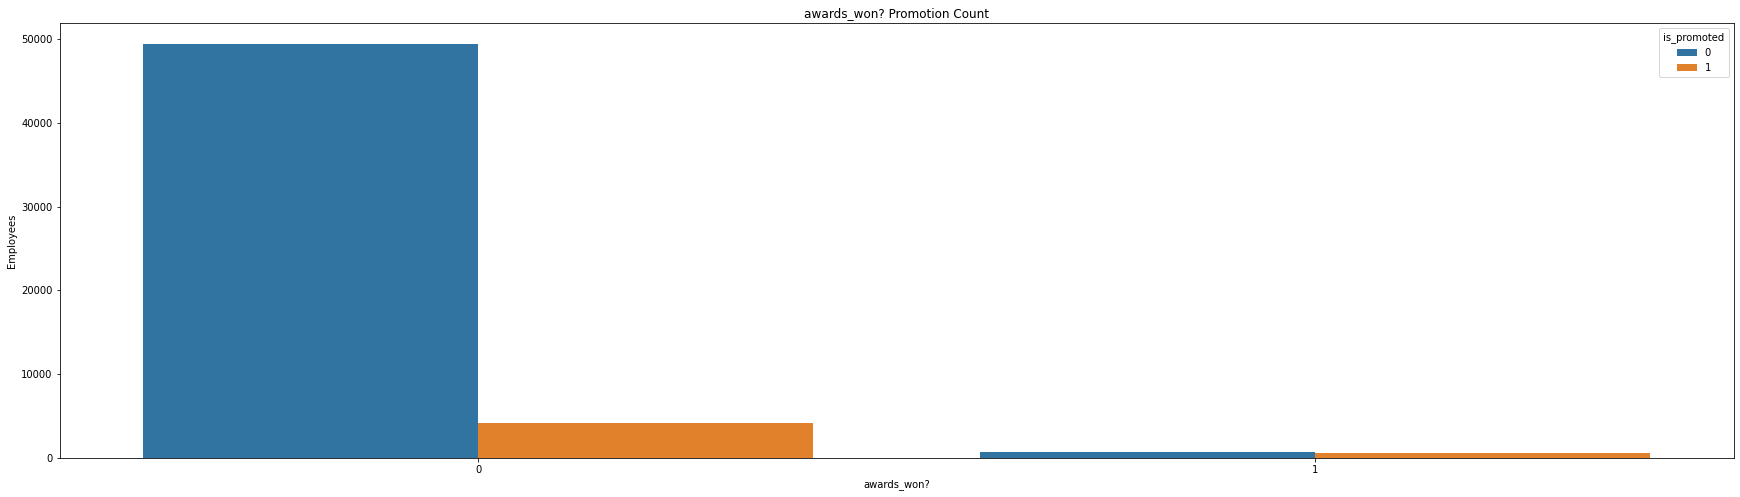

In [ ]:
plt.figure(figsize=(30,8))
sns.countplot(x='awards_won?',hue='is_promoted',data=df_train)
plt.title('awards_won? Promotion Count')
plt.xlabel('awards_won?')
plt.ylabel('Employees')
plt.show()

In [ ]:
y=df_train.groupby(['awards_won?','is_promoted'])['is_promoted'].count().unstack()
percent_promotion = y[1] / (y[0]+y[1])
percent_promotion.sort_values(ascending=False).head()

awards_won?
1    0.440157
0    0.076749
dtype: float64

**สรุป:** 
1. จํานวนคนที่ ได้รับรางวัล มีจํานวนน้อยกว่าคนคนที่ ไม่ได้รับรางวัล

2. อัตราการเลื่อนขั้นของคนที่ ได้รับรางวัล สูงกว่าคนที่ ไม่ได้รับรางวัล อย่างชัดเจน

###avg_training_score

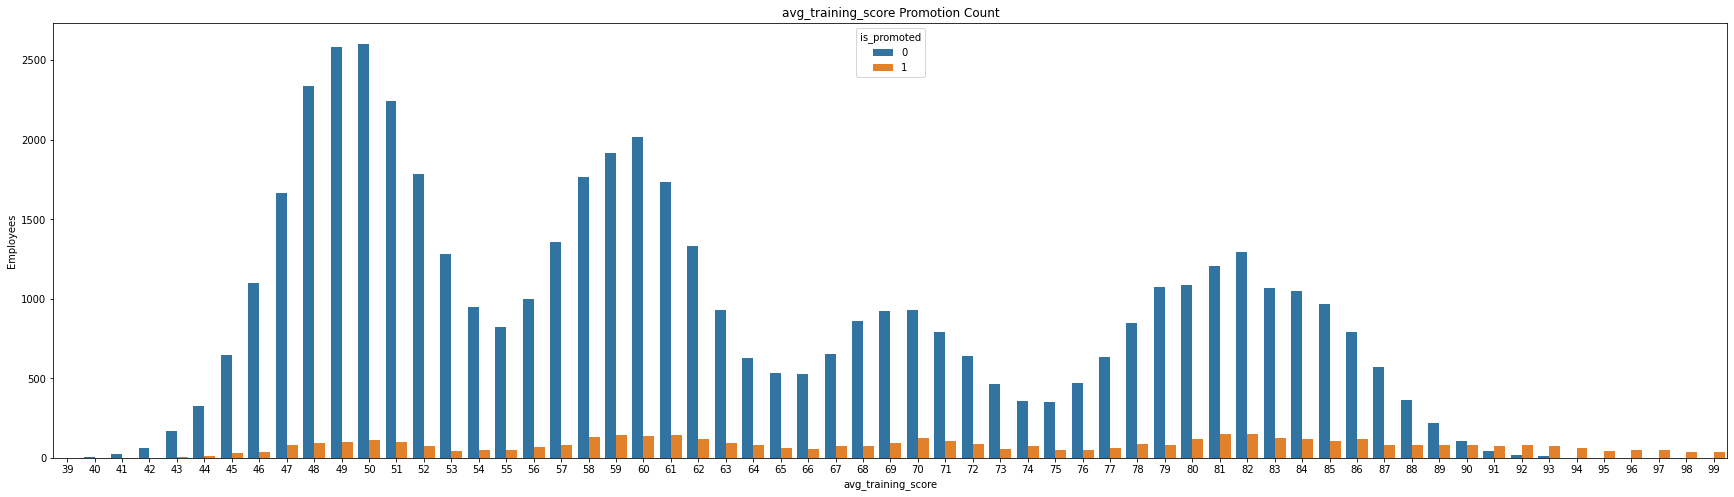

In [ ]:
plt.figure(figsize=(30,8))
sns.countplot(x='avg_training_score',hue='is_promoted',data=df_train)
plt.title('avg_training_score Promotion Count')
plt.xlabel('avg_training_score')
plt.ylabel('Employees')
plt.show()

In [ ]:
y=df_train.groupby(['avg_training_score','is_promoted'])['is_promoted'].count().unstack()
percent_promotion = y[1] / (y[0]+y[1])
percent_promotion.sort_values(ascending=False)

avg_training_score
96    0.979167
94    0.969231
93    0.892857
92    0.818182
91    0.649573
        ...   
40         NaN
95         NaN
97         NaN
98         NaN
99         NaN
Length: 61, dtype: float64

Text(0.5, 1.0, 'Avg Training Score wise Distribution of employees getting promoted or not')

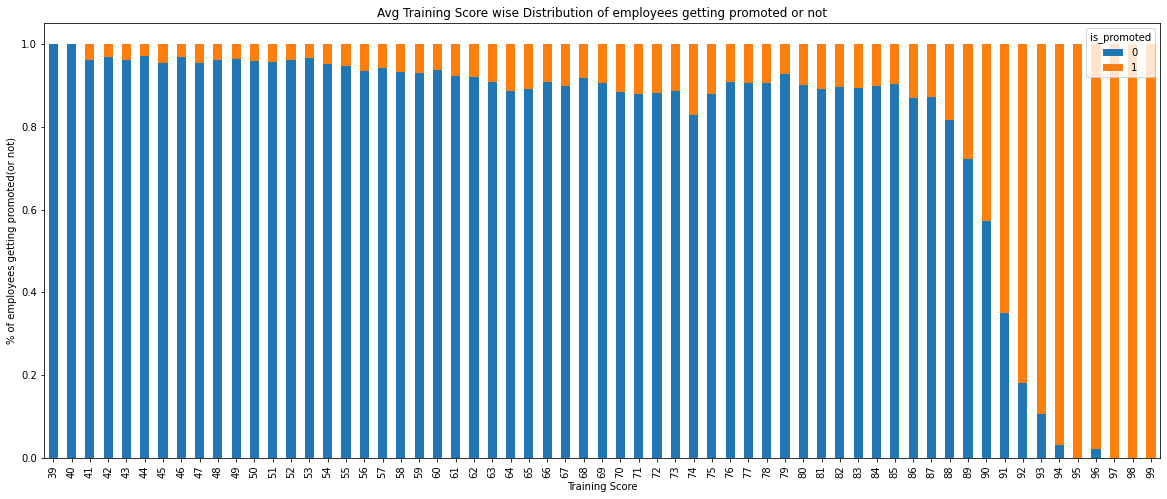

In [ ]:
#อัตราการ promote ของ avg_trainning_score
y1=y.div(y.sum(1).astype('float'), axis = 0)
y1.plot(kind = 'bar', stacked = True, figsize = (20, 8))
plt.xlabel('Training Score')
plt.ylabel('% of employees getting promoted(or not)')
plt.title("Avg Training Score wise Distribution of employees getting promoted or not")

**สรุป:** จะสังเกตได้ว่ายิ่งได้คะเเนนเฉลี่ยที่สูง ยิ่งมีอัตราการเลื่อนขั้นที่สูงเเบบเห็นได้ชัด

##**Data visualization for impute value in missing data**

---



- จะดูการกระจายตัวของข้อมูลที่ missing เพื่อหาค่ากลางที่เหมาะสมในการ impute โดยสรุปจะเป็นดังนี้
  
  - Normal Distribution ใช้ mean
  - Non-normal distribution ใช้ median 
  - Non-normal distribution เเละมีค่าโดดเพียงค่าใดค่าหนึ่งมากผิดปกติ ใช้ mode

###education

**Histrogram of education**

---



Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


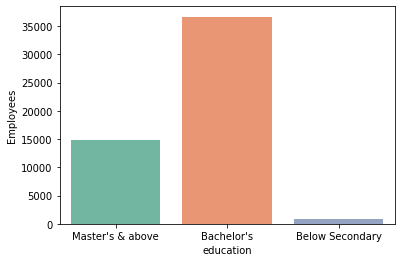

In [ ]:
print(df_train['education'].value_counts())
sns.countplot(x='education', data=df_train, palette='Set2')
plt.ylabel('Employees')
plt.show()

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64


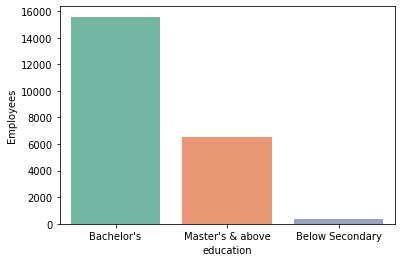

In [ ]:
print(df_test['education'].value_counts())
sns.countplot(x='education', data=df_test, palette='Set2')
plt.ylabel('Employees')
plt.show()

**Bar plot of education and is_promoted**

---



Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


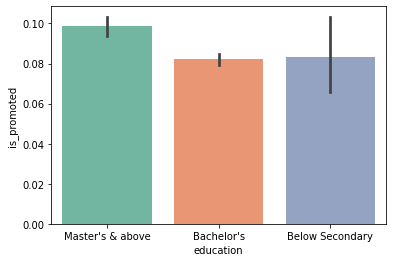

In [ ]:
print(df_train['education'].value_counts())
sns.barplot(x='education', y='is_promoted', data=df_train, palette='Set2')
plt.show()

**ความสัมพันธ์จากตาราง**

---



In [ ]:
df_train[df_train['education'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,0,53,0
54717,7684,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,0,86,0
54729,1797,HR,region_2,NaN,f,other,1,28,3.0,2,0,0,53,0
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,0,47,0


###previous_year_rating

**Histrogram of previous_year_rating**

---



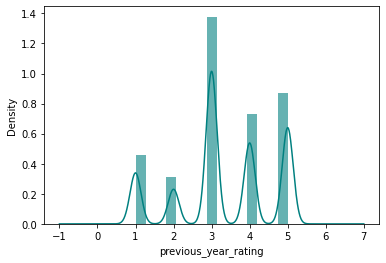

In [ ]:
ax = df_train["previous_year_rating"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df_train["previous_year_rating"].plot(kind='density', color='teal')
ax.set(xlabel='previous_year_rating')
plt.show()

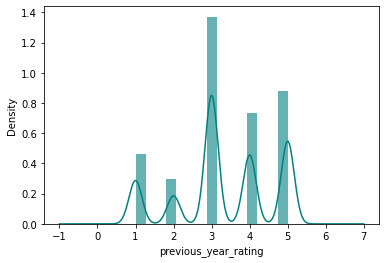

In [ ]:
ax = df_test["previous_year_rating"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df_test["previous_year_rating"].plot(kind='density', color='teal')
ax.set(xlabel='previous_year_rating')
plt.show()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


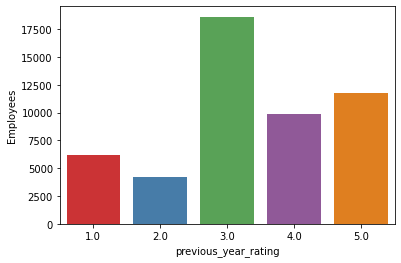

In [ ]:
print(df_train['previous_year_rating'].value_counts())
sns.countplot(x='previous_year_rating', data=df_train, palette='Set1')
plt.ylabel('Employees')
plt.show()

3.0    7921
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: previous_year_rating, dtype: int64


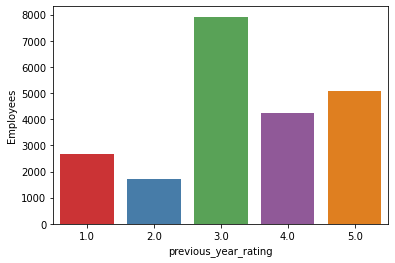

In [ ]:
print(df_test['previous_year_rating'].value_counts())
sns.countplot(x='previous_year_rating', data=df_test, palette='Set1')
plt.ylabel('Employees')
plt.show()

**ความสัมพันธ์จากตาราง**

---

select rows of a pandas dataframe by missing values

https://www.codegrepper.com/code-examples/python/how+to+find+rows+with+missing+data+in+pandas


How do I select rows from a DataFrame based on column values?

https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values

In [ ]:
nullofrating = df_train[df_train['previous_year_rating'].isnull()]
nullofrating

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


In [ ]:
nullofrating.shape

(4124, 14)

In [ ]:
df_test[df_test['previous_year_rating'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
21,5677,Technology,region_17,Bachelor's,m,sourcing,1,25,NaN,1,0,0,80
32,67672,Technology,region_17,Bachelor's,m,other,1,29,NaN,1,1,0,85
39,55325,Analytics,region_22,Bachelor's,m,other,1,25,NaN,1,0,0,88
47,44159,Analytics,region_22,Master's & above,m,other,1,31,NaN,1,1,0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23406,53291,Operations,region_4,Bachelor's,m,sourcing,1,32,NaN,1,1,0,62
23436,10138,Technology,region_2,Bachelor's,f,referred,1,29,NaN,1,0,0,79
23445,65765,Analytics,region_31,Bachelor's,m,sourcing,3,28,NaN,1,0,0,86
23479,39410,Sales & Marketing,region_2,Bachelor's,m,other,3,20,NaN,1,0,0,49


- จะเห็นความสัมพันธ์ว่า previous_year_rating ที่ เป็น missing value มันสัมพันธ์กับ length_of_service ที่เป็น 1 ซึ่งอาจจะเป็นเพราะ เขาพึ่งทํางานมายังไม่ถึงปี จึงยังไม่มี rating

- ทีนี้เลยอยากดูต่อว่า เเล้วคนที่ length_of_service เป็น 1 เเล้ว มี rating เนี่ยมีด้วยไหม

In [ ]:
df_numtrain = df_train[(df_train['length_of_service'] == 1) & (df_train['previous_year_rating'] > 0)]
df_numtrain

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
439,27907,Legal,region_11,Bachelor's,m,other,1,31,3.0,1,1,0,62,0
461,72690,Sales & Marketing,region_9,Master's & above,f,sourcing,1,31,3.0,1,0,0,54,0
526,43660,Operations,region_8,Bachelor's,f,sourcing,1,25,3.0,1,0,0,62,0
536,6731,R&D,region_29,Bachelor's,m,sourcing,1,30,5.0,1,0,0,96,1
784,28187,Sales & Marketing,region_28,Master's & above,f,other,1,31,3.0,1,0,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54509,47142,Sales & Marketing,region_22,Bachelor's,m,other,2,26,3.0,1,0,0,50,0
54566,1714,Technology,region_29,Bachelor's,m,sourcing,1,25,4.0,1,1,0,74,0
54587,39089,Operations,region_31,NaN,m,sourcing,1,27,2.0,1,0,0,59,0
54631,44287,Finance,region_28,Bachelor's,f,other,1,27,3.0,1,0,0,61,0


In [ ]:
df_numtrain.shape

(423, 14)

###**Conclusion of Solution:** 


1. ในส่วนของ education จากการ visualize จะทําให้เห็นว่า ความสัมพันธ์เเบบตารางกับ bar plotไม่ได้มีนัยสําคัญอะไร จึงควรโฟกัสไปที่ histogram ซึ่งจะสรุปได้ว่าควร เลือกค่า mode หรือ ข้อมูลที่มีความถี่สูงที่สุดมา impute นั่นคือ Bachelor's

  **(education จะ impute ค่า Bachelor's)**

2. ในส่วนของ previous_year_rating จากตอนทํา histogram จะเห็นว่า rating ที่น่าหยิบมา impute คือ 3 ซึ่งเป็นค่า mode เเต่เมื่อมาดูความสัมพันะ์จากตารางจะสังเกตเห็นว่า ค่า NaN มีความสัมพันธ์กับ length_of_service ที่มีค่าเป็น 1 ซึ่งหมายความว่าพนักงานคนนั้นอาจจะยังทํางานได้ไม่ถึงปี เเละเมื่อดูค่า shape จะสังเกตเห็นว่า 1 ส่วนมากนั้นจะเป็น ค่า NaN ดังนั้นเราจึงควร impute ค่าใหม่เข้าไปนั่นคือค่า 0 

  **(previous_year_rating จะ impute ค่า 0)**

#**Data Preprocessing**

---

##**Data Cleansing**

---



###Time to clean!!

In [ ]:
df_train_clean = df_train.copy()
df_test_clean = df_test.copy()

In [ ]:
df_train['education'].value_counts().idxmax()

"Bachelor's"

In [ ]:
df_test['education'].value_counts().idxmax()

"Bachelor's"

In [ ]:
df_train_clean['education'].fillna(df_train['education'].value_counts().idxmax(), inplace=True)
df_train_clean['previous_year_rating'].fillna(0, inplace=True)
df_test_clean['education'].fillna(df_test['education'].value_counts().idxmax(), inplace=True)
df_test_clean['previous_year_rating'].fillna(0, inplace=True)

###Check Missing values

In [ ]:
df_train_clean.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
df_test_clean.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [ ]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
df_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [ ]:
df_train_clean.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
df_test_clean.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,0.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


###**Conclusion:** Now dataset is Clean!

Checking ว่าเปลี่ยนไปมากไหม

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


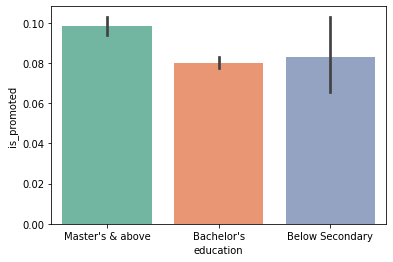

In [ ]:
print(df_train_clean['education'].value_counts())
sns.barplot(x='education', y='is_promoted', data=df_train_clean, palette='Set2')
plt.show()

In [ ]:
df_train_clean['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
0.0     4124
Name: previous_year_rating, dtype: int64

##**Visualize after cleansing**

---



###education

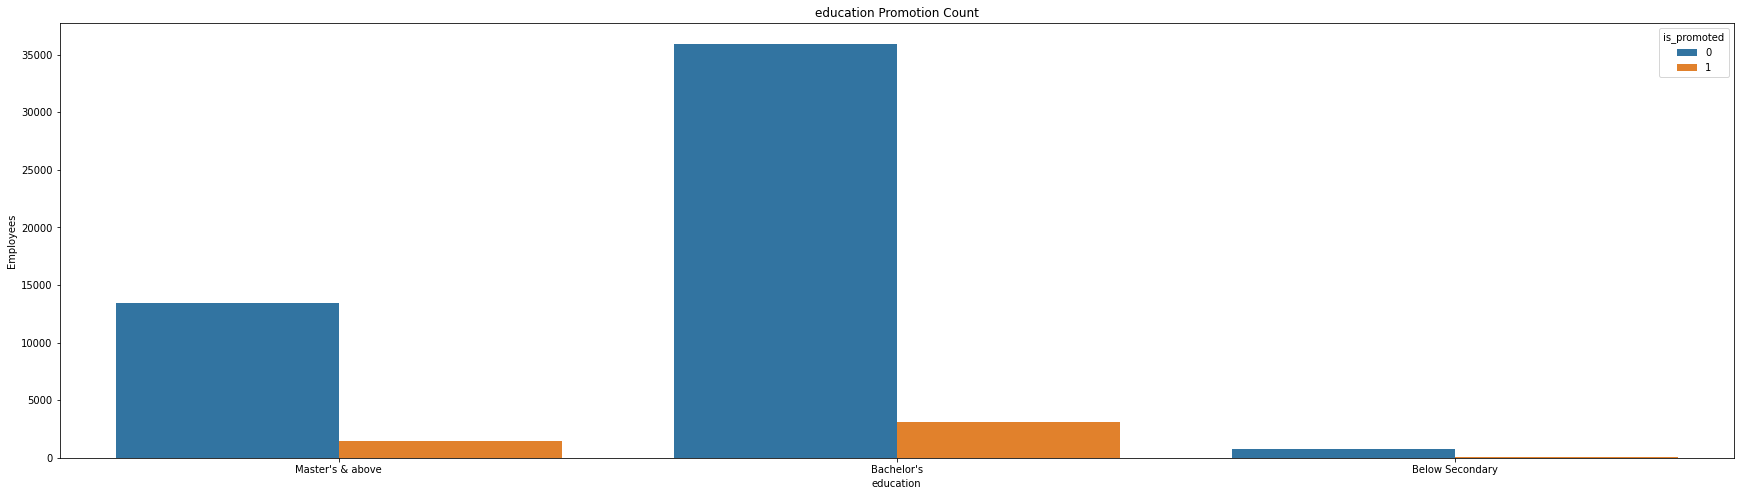

In [ ]:
plt.figure(figsize=(30,8))
sns.countplot(x='education',hue='is_promoted',data=df_train_clean)
plt.title('education Promotion Count')
plt.xlabel('education')
plt.ylabel('Employees')
plt.show()

In [ ]:
y=df_train_clean.groupby(['education','is_promoted'])['is_promoted'].count().unstack()
percent_promotion = y[1] / (y[0]+y[1])
percent_promotion.sort_values(ascending=False)

education
Master's & above    0.098559
Below Secondary     0.083230
Bachelor's          0.080096
dtype: float64

Text(0.5, 1.0, 'education wise Distribution of employees getting promoted or not')

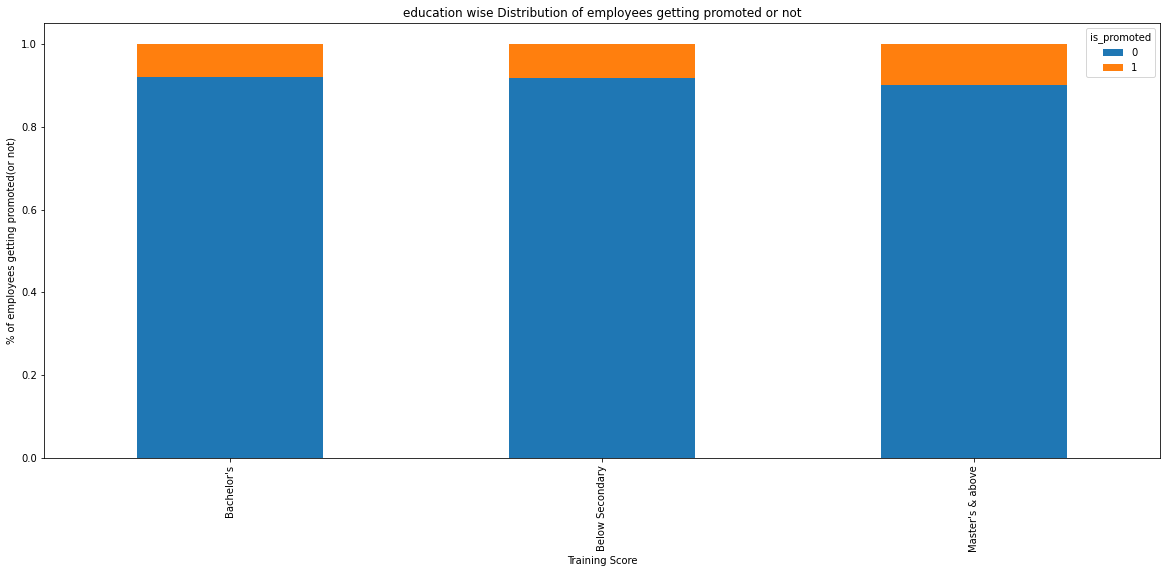

In [ ]:
#อัตราการ promote ของ avg_trainning_score
y1=y.div(y.sum(1).astype('float'), axis = 0)
y1.plot(kind = 'bar', stacked = True, figsize = (20, 8))
plt.xlabel('Training Score')
plt.ylabel('% of employees getting promoted(or not)')
plt.title("education wise Distribution of employees getting promoted or not")

**สรุป:** อัตราการเลื่อนขั้นของพนักงานในทุกระดับการศึกษาเเทบไม่เเตกต่างกันเท่าไหร่นัก โดยเรียงจากมากไปน้อยได้ 

Master's & above > Below Secondary > Bachelor's  

###previous_year_rating

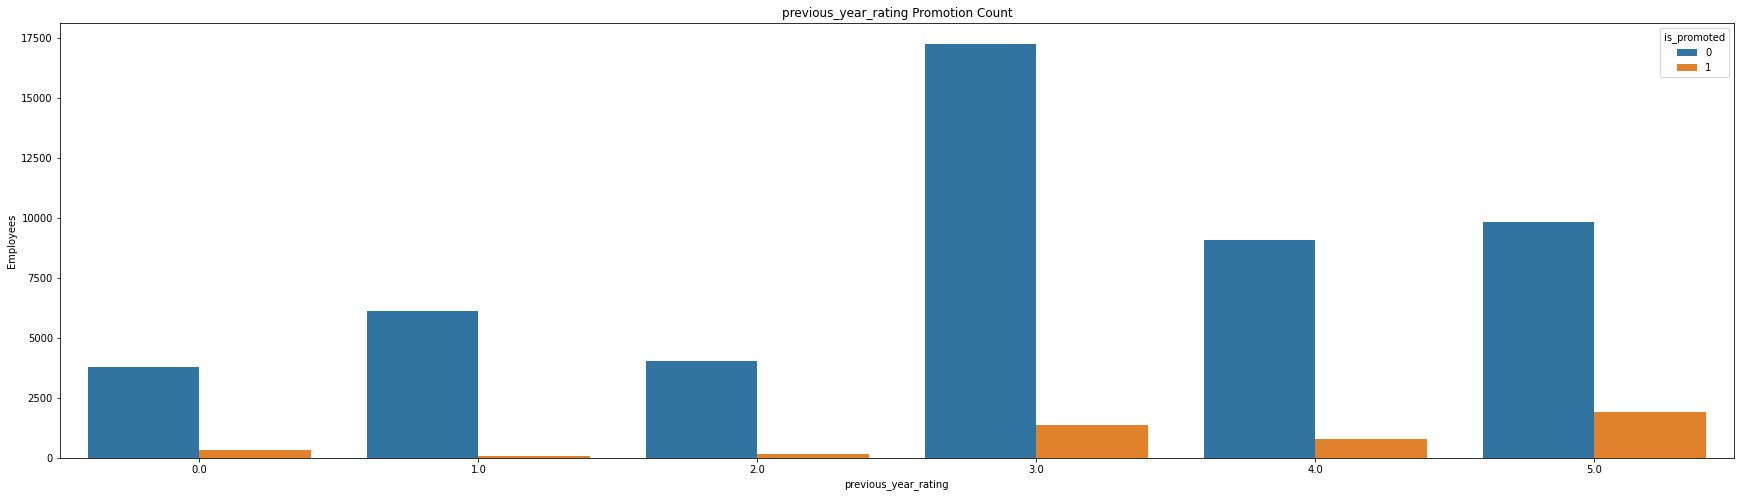

In [ ]:
plt.figure(figsize=(30,8))
sns.countplot(x='previous_year_rating',hue='is_promoted',data=df_train_clean)
plt.title('previous_year_rating Promotion Count')
plt.xlabel('previous_year_rating')
plt.ylabel('Employees')
plt.show()

In [ ]:
y=df_train_clean.groupby(['previous_year_rating','is_promoted'])['is_promoted'].count().unstack()
percent_promotion = y[1] / (y[0]+y[1])
percent_promotion.sort_values(ascending=False)

previous_year_rating
5.0    0.163615
0.0    0.082202
4.0    0.079376
3.0    0.072779
2.0    0.042840
1.0    0.014141
dtype: float64

Text(0.5, 1.0, 'previous_year_rating wise Distribution of employees getting promoted or not')

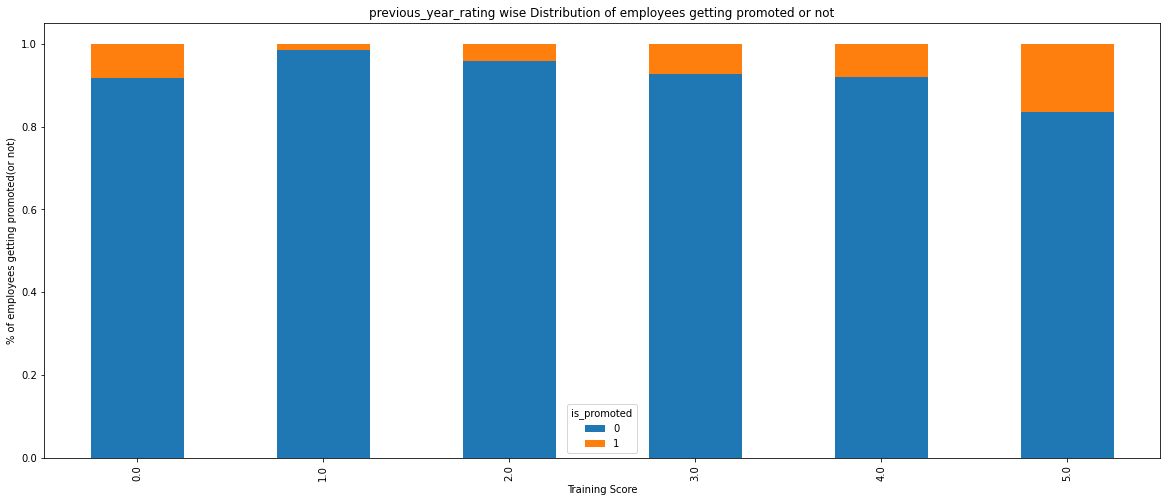

In [ ]:
#อัตราการ promote ของ avg_trainning_score
y1=y.div(y.sum(1).astype('float'), axis = 0)
y1.plot(kind = 'bar', stacked = True, figsize = (20, 8))
plt.xlabel('Training Score')
plt.ylabel('% of employees getting promoted(or not)')
plt.title("previous_year_rating wise Distribution of employees getting promoted or not")

**สรุป:**

1. คนส่วนมาก rating อยู่ที่ประมาณ 3 เเล้วไล่ลงไป 3 > 5 > 4 > 1 > 2 > 0
2. อัตราเลื่อนขั้นของคนที่ยังไม่มี rating(rating = 0) กับ คนที่ rating ตั้งเเต่ 3 ขึ้นไปมีอัตราการเลื่อนขั้นที่สูงกว่าคนที่มี rating ตํ่ากว่า 3

  (คนที่พึ่งเข้าทํางาน กับคนที่ rating >3 อัตราการเลื่อนขั้นสูง)

##**Features selection**

---
Features ที่น่าสนใจ


**Cagetorical features:**

- recruitment_channel

**Numerical features:**

- no_of_trainings
- previous_year_rating
- length_of_service(พอใช้)
- KPIs_met >80%
- awards_won?
- avg_training_score


In [ ]:
Selected_Features = ['no_of_trainings','previous_year_rating','KPIs_met >80%','awards_won?','avg_training_score']
Selected_Features2 = ['no_of_trainings','previous_year_rating','KPIs_met >80%','awards_won?','avg_training_score','length_of_service']
Selected_Features3 = ['no_of_trainings','previous_year_rating','KPIs_met >80%','awards_won?','avg_training_score','length_of_service','recruitment_channel']
Selected_Features4 = ['no_of_trainings','previous_year_rating','KPIs_met >80%','awards_won?','avg_training_score','recruitment_channel']

In [ ]:
X = df_train_clean[Selected_Features]
X.head()

,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,1,5.0,1,0,49
1,1,5.0,0,0,60
2,1,3.0,0,0,50
3,2,1.0,0,0,50
4,1,3.0,0,0,73


In [ ]:
y = df_train_clean[['is_promoted']]
y.head()

,is_promoted
0,0
1,0
2,0
3,0
4,0


##**Split Train/Test Dataset**

---



เพื่อป้องกันการ Leaked ของ data จะ split เลย ที่ทํา cleaning ก่อน split เพราะ ไม่ได้ imput ค่าอะไรจากการคํานวณทาง statistic

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Check Imbalance**

---


In [ ]:
check = pd.concat([X_train, y_train], axis=1)

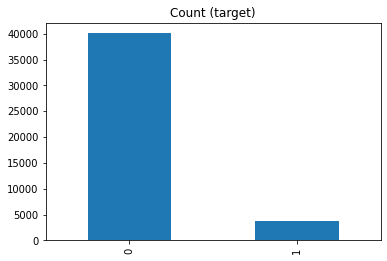

In [ ]:
check.is_promoted.value_counts().plot(kind='bar', title='Count (target)');

##**Data Transformation**

---



###Encoding 

- Categorical data to numerical data : จากการดู visualization ที่ได้ทําไปมีตัวที่สนใจเป็น 

1.recruitment_channel

ปล. ถ้าเลือก features ที่ไม่มี recruitment_channel ก็ไม่ต้องทํา process นี้


In [ ]:
# dummy1=pd.get_dummies(X_train['recruitment_channel'])
# X_train=X_train.join(dummy1)

# dummy2=pd.get_dummies(X_test['recruitment_channel'])
# X_test=X_test.join(dummy2)

In [ ]:
# X_train.drop('recruitment_channel',axis=1,inplace=True)
# X_test.drop('recruitment_channel',axis=1,inplace=True)

In [ ]:
# X_train.head()

In [ ]:
# X_test.head()

In [ ]:
# print ('Train set:', X_train.shape,  y_train.shape)
# print ('Test set:', X_test.shape,  y_test.shape)

###Data Scaling

- เเปลงเป็น numpy array ก่อน

In [ ]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
#scaler = Normalizer()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[0.        , 1.        , 1.        , 0.        , 0.15      ],
       [0.        , 0.2       , 0.        , 0.        , 0.65      ],
       [0.22222222, 0.8       , 1.        , 0.        , 0.63333333],
       ...,
       [0.        , 1.        , 1.        , 0.        , 0.43333333],
       [0.22222222, 1.        , 0.        , 0.        , 0.78333333],
       [0.        , 0.2       , 0.        , 0.        , 0.23333333]])

In [ ]:
X_test_scaled

array([[0.        , 1.        , 0.        , 0.        , 0.13333333],
       [0.22222222, 0.2       , 0.        , 0.        , 0.2       ],
       [0.11111111, 0.6       , 0.        , 0.        , 0.41666667],
       ...,
       [0.        , 1.        , 1.        , 0.        , 0.18333333],
       [0.        , 0.4       , 0.        , 0.        , 0.16666667],
       [0.        , 0.6       , 0.        , 0.        , 0.25      ]])

In [ ]:
print ('Train set:', X_train_scaled.shape,  y_train.shape)
print ('Test set:', X_test_scaled.shape,  y_test.shape)

Train set: (43846, 5) (43846, 1)
Test set: (10962, 5) (10962, 1)


##**Balancing Data**

---



In [ ]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

print('Original dataset shape', Counter(y_train.is_promoted))
print('Resample dataset shape', Counter(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Original dataset shape Counter({0: 40086, 1: 3760})
Resample dataset shape Counter({0: 40086, 1: 40086})


In [ ]:
x_smote

array([[0.        , 1.        , 1.        , 0.        , 0.15      ],
       [0.        , 0.2       , 0.        , 0.        , 0.65      ],
       [0.22222222, 0.8       , 1.        , 0.        , 0.63333333],
       ...,
       [0.        , 0.6       , 1.        , 0.        , 0.36666667],
       [0.        , 0.6       , 1.        , 0.        , 0.88333333],
       [0.        , 0.2       , 1.        , 0.        , 0.17541222]])

In [ ]:
y_smote

array([0, 0, 0, ..., 1, 1, 1])

#**Modeling**

---

- Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading.

- Recall จะเป็นค่าหลักที่ดูเพราะอยากให้มันทายได้ ถูกในส่วนของคนที่จะได้ promote (1) เยอะๆ

##**Logistic Regression**

---



In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear',penalty ='l2')
LR.fit(x_smote,y_smote)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yhat = LR.predict(X_test_scaled)
yhat

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 694  214]
 [2902 7152]]


In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     10054
           1       0.19      0.76      0.31       908

    accuracy                           0.72     10962
   macro avg       0.58      0.74      0.56     10962
weighted avg       0.91      0.72      0.78     10962



In [ ]:
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat))

Jaccard score: 0.7157


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



##**Decision Tree**

---



In [ ]:
dtc = DecisionTreeClassifier(max_depth=20)
dtc.fit(x_smote, y_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtc_pred = dtc.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(y_test, dtc_pred, labels=[1,0]))

[[ 616  292]
 [2567 7487]]


In [ ]:
print (classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84     10054
           1       0.19      0.68      0.30       908

    accuracy                           0.74     10962
   macro avg       0.58      0.71      0.57     10962
weighted avg       0.90      0.74      0.80     10962



In [ ]:
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, dtc_pred))

Jaccard score: 0.7392


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



##**RandomForest**

---



In [ ]:
rfc = RandomForestClassifier(max_depth=50, max_features='sqrt',
                       min_samples_split=15, n_estimators=400, random_state=1)
rfc.fit(x_smote, y_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(y_test, rfc_pred, labels=[1,0]))

[[ 630  278]
 [2630 7424]]


In [ ]:
print (classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84     10054
           1       0.19      0.69      0.30       908

    accuracy                           0.73     10962
   macro avg       0.58      0.72      0.57     10962
weighted avg       0.90      0.73      0.79     10962



In [ ]:
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, rfc_pred))

Jaccard score: 0.7347


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



##**KNN**

---



In [ ]:
knc = KNeighborsClassifier(n_neighbors=21, metric='minkowski' )
knc.fit(x_smote, y_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [ ]:
knc_pred = knc.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(y_test, knc_pred, labels=[1,0]))

[[ 278  630]
 [ 566 9488]]


In [ ]:
print (classification_report(y_test, knc_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10054
           1       0.33      0.31      0.32       908

    accuracy                           0.89     10962
   macro avg       0.63      0.62      0.63     10962
weighted avg       0.89      0.89      0.89     10962



In [ ]:
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, knc_pred))

Jaccard score: 0.8909


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



##**SVM**

---



In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()

In [ ]:
clf.fit(x_smote, y_smote) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
yhat = clf.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 796  112]
 [3468 6586]]


In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79     10054
           1       0.19      0.88      0.31       908

    accuracy                           0.67     10962
   macro avg       0.58      0.77      0.55     10962
weighted avg       0.92      0.67      0.75     10962



In [ ]:
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat))

Jaccard score: 0.6734


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



##**XGBoost**

---



In [ ]:
classifier = XGBClassifier()

In [ ]:
classifier.fit(x_smote, y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
yhat = classifier.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 779  129]
 [3255 6799]]


In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80     10054
           1       0.19      0.86      0.32       908

    accuracy                           0.69     10962
   macro avg       0.59      0.77      0.56     10962
weighted avg       0.92      0.69      0.76     10962



In [ ]:
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, knc_pred))

Jaccard score: 0.9023


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



##**ตัวอย่างผลที่ไม่เเก้ imbalance**: 

จะเห็นว่ามันจะ มีปัญหาทายเเต่เลขใดเลขหนึ่งมากไป ACC ดีก็จริงเเต่มันใช้จริงได้ไม่ดีเเน่ๆ 

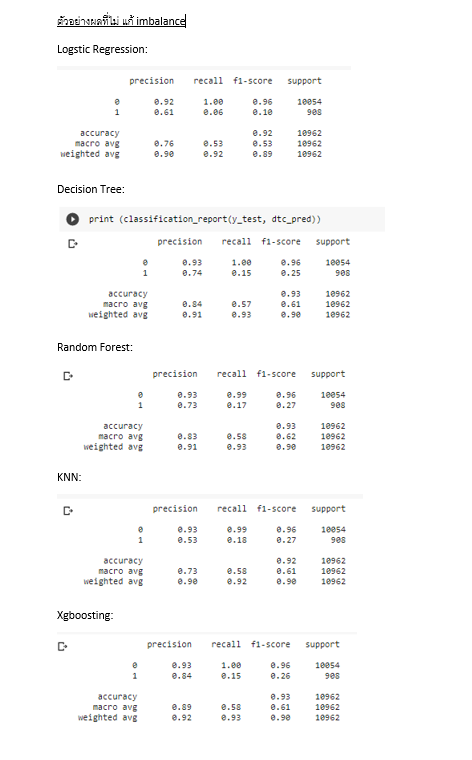

##**เทียบ performance**

---
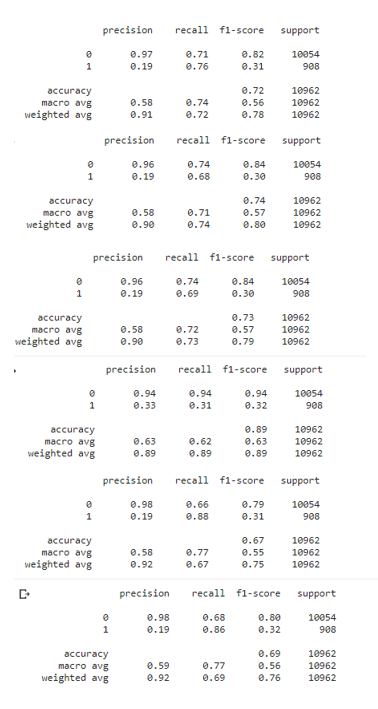


##Performance ของคนอื่น

https://www.kaggle.com/lautaropacella/promotion-prediction

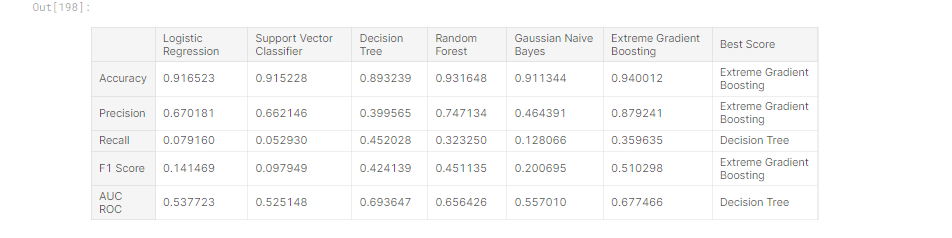

เมื่อเปรียบเทียบกับของเราของเราดูใช้งานจริงได้มากกว่า

#**Predict df_test**

---

Logistic Regression เป็น model ที่ performance ดีที่สุด ซึ่งจะเลือกมาใช้ในการ predict df_test

In [ ]:
df_test_clean[Selected_Features]

,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,1,0.0,1,0,77
1,1,3.0,0,0,51
2,1,1.0,0,0,47
3,3,2.0,0,0,65
4,1,4.0,0,0,61
...,...,...,...,...,...
23485,1,3.0,0,0,61
23486,1,3.0,0,0,74
23487,1,4.0,0,0,50
23488,3,0.0,0,0,70


In [ ]:
df_test_scaled = scaler.transform(df_test_clean[Selected_Features])

In [ ]:
df_test_scaled

array([[0.        , 0.        , 1.        , 0.        , 0.63333333],
       [0.        , 0.6       , 0.        , 0.        , 0.2       ],
       [0.        , 0.2       , 0.        , 0.        , 0.13333333],
       ...,
       [0.        , 0.8       , 0.        , 0.        , 0.18333333],
       [0.22222222, 0.        , 0.        , 0.        , 0.51666667],
       [0.22222222, 1.        , 1.        , 0.        , 0.83333333]])

In [ ]:
y_dfunseen = LR.predict(df_test_scaled)
y_dfunseen

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
promotions_pred = pd.DataFrame(y_dfunseen)

In [ ]:
promotions_pred

,0
0,1
1,0
2,0
3,0
4,0
...,...
23485,0
23486,0
23487,0
23488,0


In [ ]:
promotions_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       23490 non-null  int64
dtypes: int64(1)
memory usage: 183.6 KB


#**Conclusion:**

---



ในการได้ผลลัพธ์ที่ดีที่สุด 

- Selected_Features = ['no_of_trainings','previous_year_rating','KPIs_met >80%','awards_won?','avg_training_score']

- scaler = MinMaxScaler()

- เเก้ Imbalance dataset: Upsampling(smote)

- ระวังเรื่อง Process เพื่อป้องกัน data leaked

- Tuning Hyperparameter

เเนวการปรับปรุง

- visualization เพื่อหาคุณลักษณะให้ดีกว่าเดิม 
- ลองใช้ DL
- Tuning Hyperparameter: gridsearch / randomsearch
- มีวิธีรับมือ Imbalance data set ที่ดีกว่านี้
- ศึกษาเทคนิค preprocessing data ต่อไป

สิ่งที่ได้เรียนรู้: 

- การตระหนักถึงปัญหา data leaked สําคัญมาก เเทบจะเปลี่ยนทุกอย่างของ process ที่ปกติทํา 

- การ ทํา EDA analyze เเละ visualization ข้อมูลเพื่อวิเคราะห์ 

- ได้เข้าใจ process การทํา Model Machine learning เเบบละเอียดๆ
- ได้ฝึกเเละทําความเข้าใจเรื่อง preprocessing data มากขึ้น  เช่น cleaning,encoding, feature scaling etc.


- ได้ลองรับมือกับปัญหา imbalance dataset classification

